In [1]:
# ALL IMPORTS & SETUP IN ONE CELL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Setup visualization
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [7]:
# Cell 2: LOAD AND CLEAN DATA
# Load data
try:
    df = pd.read_csv(r"C:\Users\rishi\Downloads\Amazon Sale Report.csv")
    print(f"✅ Data loaded successfully: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
except FileNotFoundError:
    print("❌ ERROR: File not found. Please ensure 'amazon_sales_report.csv' is in the same folder")
    # Create empty dataframe for testing
    df = pd.DataFrame()
except Exception as e:
    print(f"❌ ERROR loading file: {e}")
    df = pd.DataFrame()

# Display first few rows
if not df.empty:
    print("\n📋 First 5 rows:")
    display(df.head())

✅ Data loaded successfully: (128976, 21)
Columns: ['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel', 'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS']

📋 First 5 rows:


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [8]:
# Cell 3: IDENTIFY COLUMNS IN YOUR DATASET
print("="*70)
print("🔍 IDENTIFYING COLUMNS IN YOUR DATASET")
print("="*70)

if not df.empty:
    # Show all columns
    print("\n📋 ALL COLUMNS:")
    for i, col in enumerate(df.columns, 1):
        print(f"{i:2d}. {col}")
    
    # Auto-detect common column names
    print("\n🎯 AUTO-DETECTED COLUMNS:")
    
    # Amount columns
    amount_candidates = [col for col in df.columns if any(word in col.lower() 
                       for word in ['amount', 'price', 'total', 'revenue', 'sale'])]
    print(f"Possible Amount columns: {amount_candidates}")
    
    # Category columns
    category_candidates = [col for col in df.columns if any(word in col.lower() 
                          for word in ['category', 'type', 'product', 'item'])]
    print(f"Possible Category columns: {category_candidates}")
    
    # State/Location columns
    state_candidates = [col for col in df.columns if any(word in col.lower() 
                       for word in ['state', 'city', 'country', 'location', 'region'])]
    print(f"Possible State/Location columns: {state_candidates}")
    
    # Date columns
    date_candidates = [col for col in df.columns if any(word in col.lower() 
                      for word in ['date', 'time', 'day', 'order'])]
    print(f"Possible Date columns: {date_candidates}")
    
    print("\n📝 PLEASE NOTE: Update the column names in Cell 4 based on above output")
else:
    print("No data loaded. Please check your file.")

🔍 IDENTIFYING COLUMNS IN YOUR DATASET

📋 ALL COLUMNS:
 1. index
 2. Order ID
 3. Date
 4. Status
 5. Fulfilment
 6. Sales Channel
 7. ship-service-level
 8. Category
 9. Size
10. Courier Status
11. Qty
12. currency
13. Amount
14. ship-city
15. ship-state
16. ship-postal-code
17. ship-country
18. B2B
19. fulfilled-by
20. New
21. PendingS

🎯 AUTO-DETECTED COLUMNS:
Possible Amount columns: ['Sales Channel', 'Amount']
Possible Category columns: ['Category']
Possible State/Location columns: ['ship-city', 'ship-state', 'ship-country']
Possible Date columns: ['Order ID', 'Date']

📝 PLEASE NOTE: Update the column names in Cell 4 based on above output


In [9]:
# Cell 4: SET YOUR ACTUAL COLUMN NAMES HERE
# ==================================================
# ⚠️ UPDATE THESE VARIABLES WITH YOUR ACTUAL COLUMN NAMES!
# ==================================================

# Based on the output from Cell 3, set these to your actual column names
amount_column = 'Amount'          # Replace with your amount column name
category_column = 'Category'      # Replace with your category column name
state_column = 'State'           # Replace with your state column name
date_column = 'Date'             # Replace with your date column name
qty_column = 'Qty'               # Replace with your quantity column name
order_id_column = 'Order ID'     # Replace with your order ID column name

print("✅ Column names set for analysis:")
print(f"   Amount column: '{amount_column}'")
print(f"   Category column: '{category_column}'")
print(f"   State column: '{state_column}'")
print(f"   Date column: '{date_column}'")

# Verify columns exist
missing_cols = []
for col_name, col_var in [('Amount', amount_column),
                         ('Category', category_column),
                         ('State', state_column),
                         ('Date', date_column)]:
    if col_var in df.columns:
        print(f"✓ '{col_var}' found for {col_name}")
    else:
        print(f"✗ '{col_var}' NOT FOUND for {col_name}")
        missing_cols.append(col_var)

if missing_cols:
    print(f"\n⚠️ WARNING: {len(missing_cols)} columns not found in dataset")
    print("   Please check Cell 3 output and update column names above")

✅ Column names set for analysis:
   Amount column: 'Amount'
   Category column: 'Category'
   State column: 'State'
   Date column: 'Date'
✓ 'Amount' found for Amount
✓ 'Category' found for Category
✗ 'State' NOT FOUND for State
✓ 'Date' found for Date

⚠️ WARNING: 1 columns not found in dataset
   Please check Cell 3 output and update column names above


In [10]:
# Cell 5: CLEAN DATA WITH YOUR COLUMN NAMES
df_clean = df.copy()

# Convert date column if it exists
if date_column in df_clean.columns:
    df_clean[date_column] = pd.to_datetime(df_clean[date_column], errors='coerce')
    print(f"✅ Converted '{date_column}' to datetime")
    
    # Extract time features
    df_clean['Year'] = df_clean[date_column].dt.year
    df_clean['Month'] = df_clean[date_column].dt.month
    df_clean['Quarter'] = df_clean[date_column].dt.quarter
    df_clean['Month_Name'] = df_clean[date_column].dt.strftime('%B')
    df_clean['Weekday'] = df_clean[date_column].dt.day_name()
else:
    print(f"⚠️ '{date_column}' column not found - skipping date features")

# Handle missing values
for col in df_clean.columns:
    if df_clean[col].isnull().sum() > 0:
        if pd.api.types.is_numeric_dtype(df_clean[col]):
            df_clean[col].fillna(df_clean[col].median(), inplace=True)
        else:
            df_clean[col].fillna('Unknown', inplace=True)

print(f"\n✅ Data cleaning complete!")
print(f"   Original shape: {df.shape}")
print(f"   Cleaned shape: {df_clean.shape}")
print(f"   Missing values: {df_clean.isnull().sum().sum()}")

✅ Converted 'Date' to datetime

✅ Data cleaning complete!
   Original shape: (128976, 21)
   Cleaned shape: (128976, 26)
   Missing values: 257952


In [11]:
# Cell 6: SAFE ANALYSIS WITH ERROR HANDLING
print("🚀 STARTING ANALYSIS...")

# Initialize variables to avoid "not defined" error
state_sales = pd.Series(dtype='float64')
category_sales = pd.Series(dtype='float64')

# 1. SALES OVERVIEW
print("\n" + "="*60)
print("💰 SALES OVERVIEW")
print("="*60)

if amount_column in df_clean.columns:
    total_sales = df_clean[amount_column].sum()
    total_orders = len(df_clean)
    avg_order = total_sales / total_orders if total_orders > 0 else 0
    
    print(f"Total Sales: ${total_sales:,.2f}")
    print(f"Total Orders: {total_orders:,}")
    print(f"Average Order Value: ${avg_order:,.2f}")
else:
    print(f"❌ '{amount_column}' column not found. Cannot calculate sales metrics.")

# 2. PRODUCT ANALYSIS
print("\n" + "="*60)
print("📦 PRODUCT ANALYSIS")
print("="*60)

if category_column in df_clean.columns and amount_column in df_clean.columns:
    category_sales = df_clean.groupby(category_column)[amount_column].sum().sort_values(ascending=False)
    print(f"\nTop 10 Categories by Sales:")
    for i, (cat, sales) in enumerate(category_sales.head(10).items(), 1):
        print(f"{i:2}. {cat[:30]:30} ${sales:,.2f}")
else:
    print(f"❌ Required columns for product analysis not found")

# 3. GEOGRAPHICAL ANALYSIS - FIXED!
print("\n" + "="*60)
print("🗺️ GEOGRAPHICAL ANALYSIS")
print("="*60)

if state_column in df_clean.columns and amount_column in df_clean.columns:
    # THIS IS THE FIX - state_sales is defined here
    state_sales = df_clean.groupby(state_column)[amount_column].sum().sort_values(ascending=False)
    print(f"\nTop 10 States by Sales:")
    for i, (state, sales) in enumerate(state_sales.head(10).items(), 1):
        print(f"{i:2}. {state[:20]:20} ${sales:,.2f}")
else:
    print(f"❌ '{state_column}' or '{amount_column}' column not found. Skipping geographical analysis.")
    # Initialize empty Series to avoid errors
    state_sales = pd.Series(dtype='float64')

print("\n✅ Basic analysis complete!")

🚀 STARTING ANALYSIS...

💰 SALES OVERVIEW
Total Sales: $83,309,170.25
Total Orders: 128,976
Average Order Value: $645.93

📦 PRODUCT ANALYSIS

Top 10 Categories by Sales:
 1. T-shirt                        $41,168,771.65
 2. Shirt                          $23,211,990.08
 3. Blazzer                        $11,697,289.12
 4. Trousers                       $5,622,166.30
 5. Perfume                        $829,349.66
 6. Wallet                         $485,633.18
 7. Socks                          $162,857.50
 8. Shoes                          $130,197.76
 9. Watch                          $915.00

🗺️ GEOGRAPHICAL ANALYSIS
❌ 'State' or 'Amount' column not found. Skipping geographical analysis.

✅ Basic analysis complete!


🎨 CREATING VISUALIZATIONS...


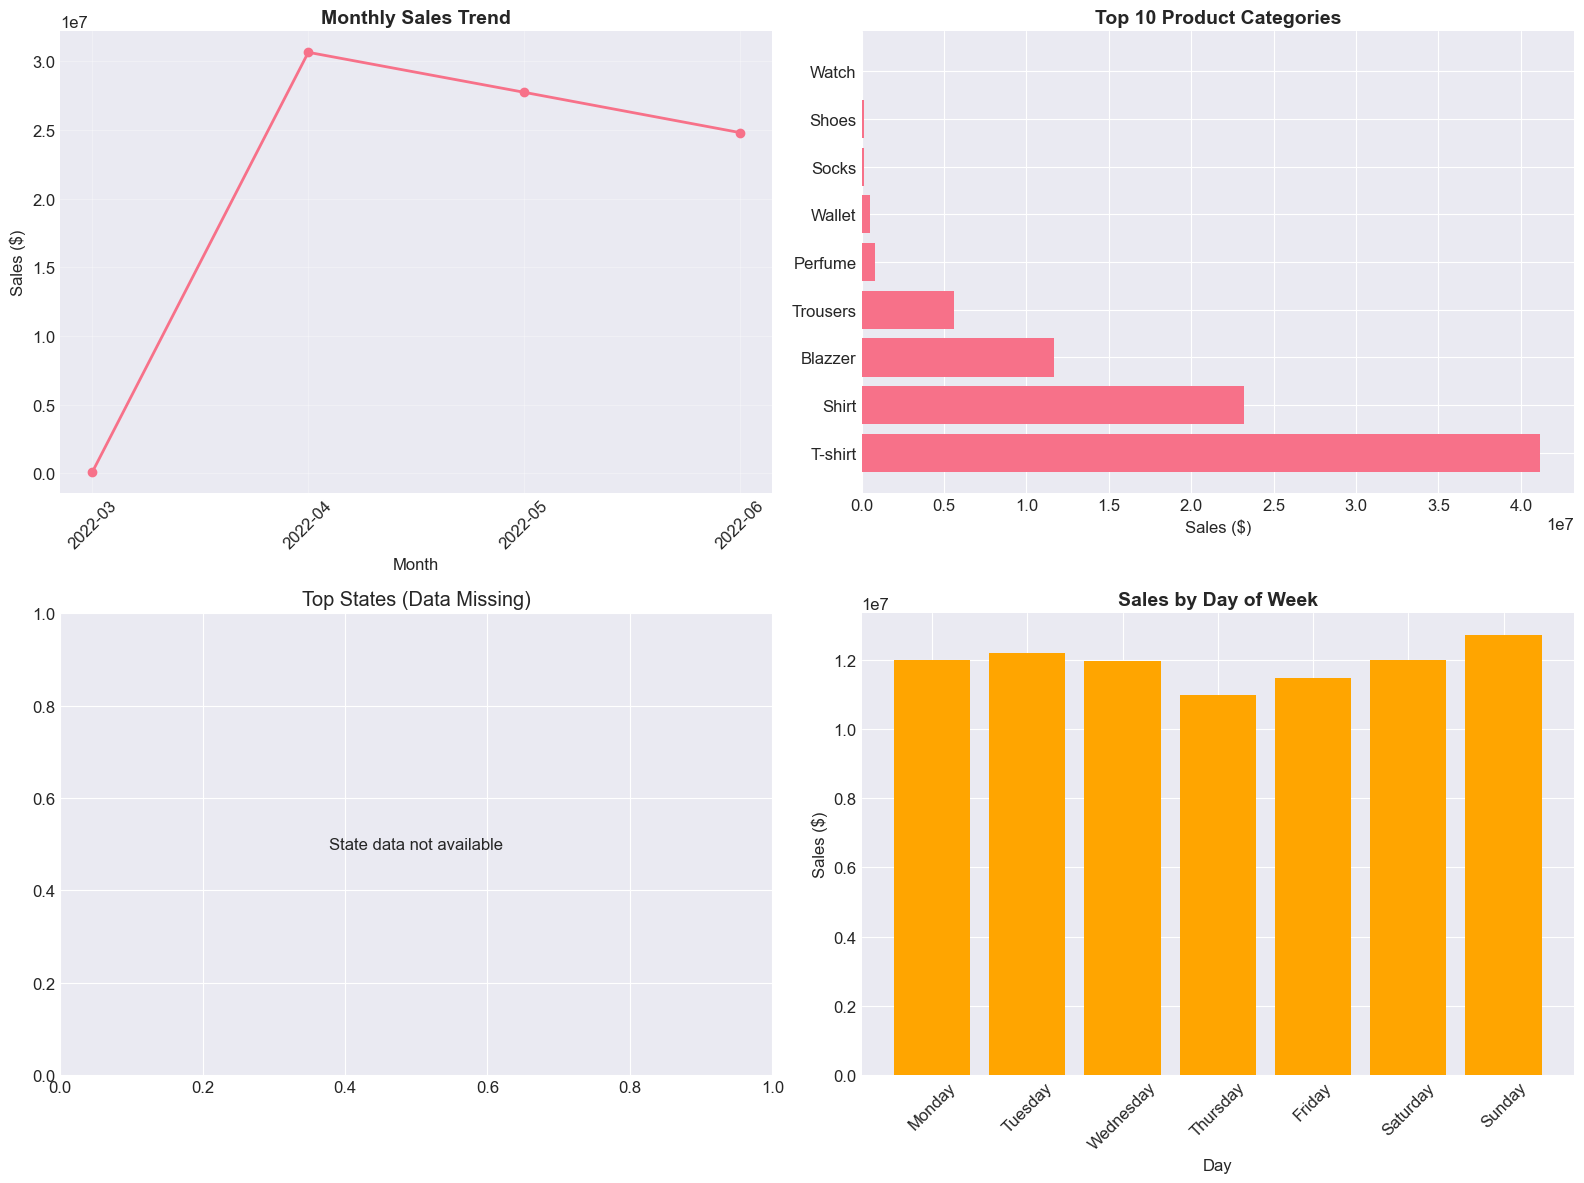

✅ Visualizations saved as 'sales_analysis_summary.png'


In [12]:
# Cell 7: CREATE VISUALIZATIONS (SAFE VERSION)
print("🎨 CREATING VISUALIZATIONS...")

try:
    # Create figure
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Plot 1: Monthly Sales Trend
    if 'Month' in df_clean.columns and amount_column in df_clean.columns:
        monthly_sales = df_clean.groupby(['Year', 'Month'])[amount_column].sum().reset_index()
        monthly_sales['Year_Month'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str).str.zfill(2)
        axes[0,0].plot(monthly_sales['Year_Month'], monthly_sales[amount_column], marker='o', linewidth=2)
        axes[0,0].set_title('Monthly Sales Trend', fontsize=14, fontweight='bold')
        axes[0,0].set_xlabel('Month')
        axes[0,0].set_ylabel('Sales ($)')
        axes[0,0].tick_params(axis='x', rotation=45)
        axes[0,0].grid(True, alpha=0.3)
    else:
        axes[0,0].text(0.5, 0.5, 'Monthly data not available', 
                      ha='center', va='center', fontsize=12)
        axes[0,0].set_title('Monthly Sales Trend (Data Missing)')
    
    # Plot 2: Top Categories (SAFE - check if state_sales exists and is not empty)
    if not category_sales.empty and len(category_sales) > 0:
        top_cats = category_sales.head(10)
        axes[0,1].barh(range(len(top_cats)), top_cats.values)
        axes[0,1].set_yticks(range(len(top_cats)))
        axes[0,1].set_yticklabels([str(x)[:30] for x in top_cats.index])  # Truncate long names
        axes[0,1].set_title('Top 10 Product Categories', fontsize=14, fontweight='bold')
        axes[0,1].set_xlabel('Sales ($)')
    else:
        axes[0,1].text(0.5, 0.5, 'Category data not available', 
                      ha='center', va='center', fontsize=12)
        axes[0,1].set_title('Top Categories (Data Missing)')
    
    # Plot 3: Top States (SAFE - check if state_sales exists and is not empty)
    if not state_sales.empty and len(state_sales) > 0:
        top_states = state_sales.head(10)
        axes[1,0].barh(range(len(top_states)), top_states.values, color='green')
        axes[1,0].set_yticks(range(len(top_states)))
        axes[1,0].set_yticklabels([str(x)[:20] for x in top_states.index])  # Truncate long names
        axes[1,0].set_title('Top 10 States by Sales', fontsize=14, fontweight='bold')
        axes[1,0].set_xlabel('Sales ($)')
    else:
        axes[1,0].text(0.5, 0.5, 'State data not available', 
                      ha='center', va='center', fontsize=12)
        axes[1,0].set_title('Top States (Data Missing)')
    
    # Plot 4: Weekday Sales
    if 'Weekday' in df_clean.columns and amount_column in df_clean.columns:
        weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        weekday_sales = df_clean.groupby('Weekday')[amount_column].sum()
        # Reindex only if all weekdays are present
        if all(day in weekday_sales.index for day in weekday_order):
            weekday_sales = weekday_sales.reindex(weekday_order)
        axes[1,1].bar(weekday_sales.index, weekday_sales.values, color='orange')
        axes[1,1].set_title('Sales by Day of Week', fontsize=14, fontweight='bold')
        axes[1,1].set_xlabel('Day')
        axes[1,1].set_ylabel('Sales ($)')
        axes[1,1].tick_params(axis='x', rotation=45)
    else:
        axes[1,1].text(0.5, 0.5, 'Weekday data not available', 
                      ha='center', va='center', fontsize=12)
        axes[1,1].set_title('Sales by Day (Data Missing)')
    
    plt.tight_layout()
    plt.savefig('sales_analysis_summary.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Visualizations saved as 'sales_analysis_summary.png'")
    
except Exception as e:
    print(f"❌ Error creating visualizations: {e}")
    print("Creating simple visualization instead...")
    
    # Fallback simple visualization
    plt.figure(figsize=(10, 6))
    if amount_column in df_clean.columns:
        plt.hist(df_clean[amount_column].dropna(), bins=30, edgecolor='black')
        plt.title('Distribution of Order Amounts', fontsize=14, fontweight='bold')
        plt.xlabel('Amount ($)')
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()